In [1]:
import numpy as np
from BFGS import BFGSDenoiser

# Image Denoising
## Loading Data and Adding Noise

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

train_y = faces['images'][0]
test_y = faces['images'][1]

In [3]:
train_x = train_y + np.random.randn(train_y.shape[0], train_y.shape[1]) / 50
test_x = test_y + np.random.randn(test_y.shape[0], test_y.shape[1]) / 50

train_x = np.clip(train_x, 0, 1)
test_x = np.clip(test_x, 0, 1)

## Denoising

In [4]:
np.random.seed(42)

ROW, COL = 9, 9
SGD_denoiser = BFGSDenoiser(ROW,COL)

SGD_denoiser.fit(train_x, train_y, epochs=200, lr=0.5, verbose=True)

Epoch 1 | Error (* 1e6): 6089.44
Epoch 2 | Error (* 1e6): 3768.86
Epoch 3 | Error (* 1e6): 900.01
Epoch 4 | Error (* 1e6): 1769.77
Epoch 5 | Error (* 1e6): 308.42
Epoch 6 | Error (* 1e6): 138.82
Epoch 7 | Error (* 1e6): 83.25
Epoch 8 | Error (* 1e6): 66.06
Epoch 9 | Error (* 1e6): 60.44
Epoch 10 | Error (* 1e6): 58.12
Epoch 11 | Error (* 1e6): 56.55
Epoch 12 | Error (* 1e6): 54.79
Epoch 13 | Error (* 1e6): 52.28
Epoch 14 | Error (* 1e6): 48.63
Epoch 15 | Error (* 1e6): 43.80
Epoch 16 | Error (* 1e6): 38.34
Epoch 17 | Error (* 1e6): 33.28
Epoch 18 | Error (* 1e6): 29.40
Epoch 19 | Error (* 1e6): 26.74
Epoch 20 | Error (* 1e6): 24.86
Epoch 21 | Error (* 1e6): 23.28
Epoch 22 | Error (* 1e6): 21.72
Epoch 23 | Error (* 1e6): 20.08
Epoch 24 | Error (* 1e6): 18.48
Epoch 25 | Error (* 1e6): 17.15
Epoch 26 | Error (* 1e6): 16.27
Epoch 27 | Error (* 1e6): 15.78
Epoch 28 | Error (* 1e6): 15.52
Epoch 29 | Error (* 1e6): 15.35
Epoch 30 | Error (* 1e6): 15.21
Epoch 31 | Error (* 1e6): 15.02
Epoch 32

## Visualizing the Output

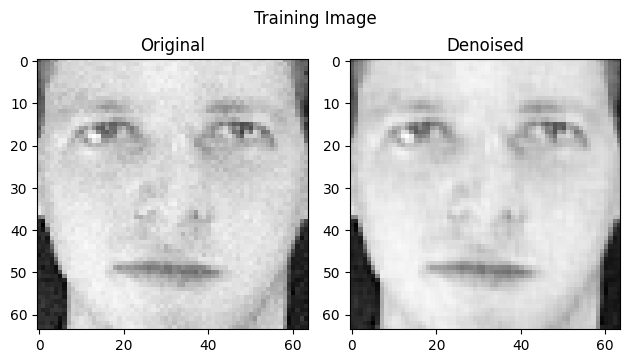

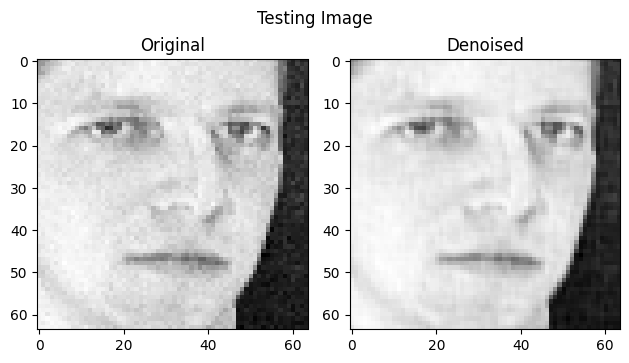

In [5]:
import matplotlib.pyplot as plt

def plot_denoised_img(input, title):
    fig, ax = plt.subplots(1,2)

    pred = SGD_denoiser.predict(input)

    ax[0].imshow(input, cmap = "Grays_r")
    ax[1].imshow(pred, cmap = "Grays_r")

    ax[0].set_title("Original")
    ax[1].set_title("Denoised")

    fig.suptitle(title, y=0.85)
    plt.tight_layout()

    plt.show()

plot_denoised_img(train_x, "Training Image")
plot_denoised_img(test_x, "Testing Image")

## Visualizing the Filter

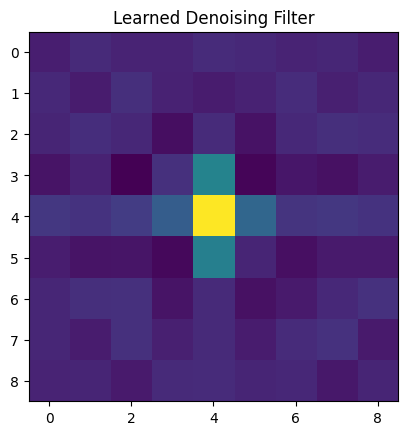

In [6]:
filter = SGD_denoiser.get_filter()

plt.imshow(filter)
plt.title("Learned Denoising Filter")
plt.show()